# A/B Testing Case Study
Case Study analyzing two different website implementations and statistical signifance of newer design on website traffic metrics

## Homepage Experiment Data
### 1. Characteristics of dataset: 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [4]:
df = pd.read_csv('../data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [ ]:
# total number of actions
df['action'].count()

In [ ]:
# number of unique users
df['id'].nunique()

In [ ]:
# action types in experiment
df['action'].value_counts()

In [ ]:
# size of control group and experiment group
#df['group'].value_counts()
df.groupby(by=['group'])['id'].nunique()

### 2. Duration of Experiment

In [ ]:
# convert to datetime 
df['timestamp'] = pd.to_datetime(df['timestamp'])

# since data is sorted, duration is difference between last and first entry
df.loc[len(df)-1, 'timestamp'] - df.loc[0,'timestamp']

### 3. Null and Alternative Hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTR_{new} - CTR_{old} \leq 0 $$
$$H_1: CTR_{new} - CTR_{old} > 0 $$

## Hypothesis Test using p-value

In [90]:
df = pd.read_csv('./data/course_page_actions.csv')
df.head()
df.shape

(4069, 5)

In [94]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.012827090815802977

In [91]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.007696007696007696

In [92]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

-0.00513108311979528

In [95]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)

(array([  19.,   93.,  489., 1340., 2444., 2866., 1858.,  720.,  151.,
          20.]),
 array([-0.01730516, -0.01496101, -0.01261687, -0.01027273, -0.00792858,
        -0.00558444, -0.00324029, -0.00089615,  0.00144799,  0.00379214,
         0.00613628]),
 <a list of 10 Patch objects>)

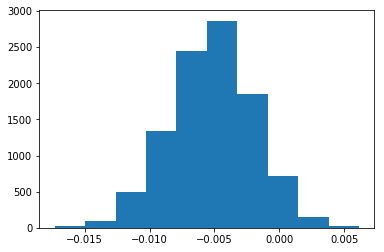

In [96]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

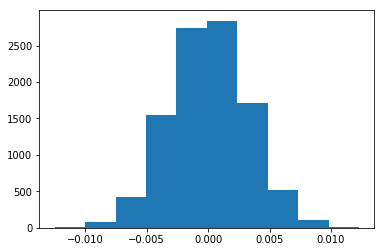

In [97]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

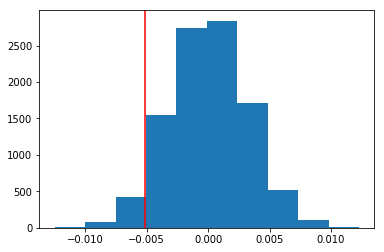

In [98]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [99]:
# Compute p-value
(null_vals > obs_diff).mean()

0.9511

### P-value Interpretation
Since the p-value is extremely high, it implies that the null hypothesis cannot be rejected as the result is not statistically significant. 